In [1]:
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
def plot_distributions(points_1, points_2):
    fig, ax = plt.subplots()

    ax.scatter(points_1[:,0], points_1[:, 1], color='blue')
    ax.scatter(points_2[:,0], points_2[:, 1], color='red')
    plt.show()

# (1)

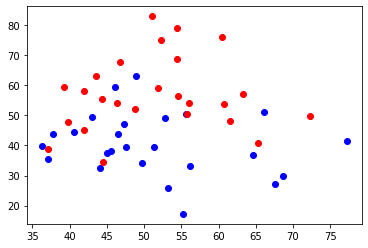

In [3]:
plot_distributions(multivariate_normal.rvs([50, 40], [[160, 0], [0, 80]], size=25),
                    multivariate_normal.rvs([50, 60], [[80, 0], [0, 160]], size=25))

# (2)

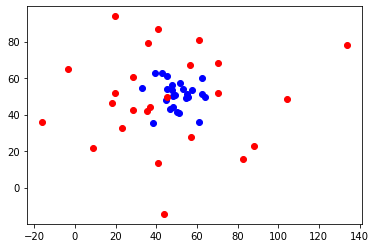

In [4]:
def push_away(point):
    x, y = point
    return [(x-50)*10+ x, (y-50)*10 + y]

plot_distributions(multivariate_normal.rvs([50, 50],
                                            [[50, 0], [0, 50]],
                                            size=25),
                    np.array([push_away(x) for x in multivariate_normal.rvs([50, 50],
                                            [[10, 0], [0, 10]],
                                            size=25)]))

# (3)

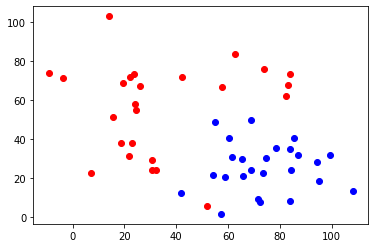

In [5]:
var = 200
mixture = np.concatenate((
                            multivariate_normal.rvs([25, 25], [[var, 0], [0, var]], size=25),
                            multivariate_normal.rvs([25, 75], [[var, 0], [0, var]], size=25),
                            multivariate_normal.rvs([75, 75], [[var, 0], [0, var]], size=25)
                        ))

indices = np.random.choice(mixture.shape[0], 25, replace=False)
mixture_sample = mixture[indices]

plot_distributions(multivariate_normal.rvs([75, 25], [[var, 0], [0, var]], size=25),
                    mixture_sample)

# (4)

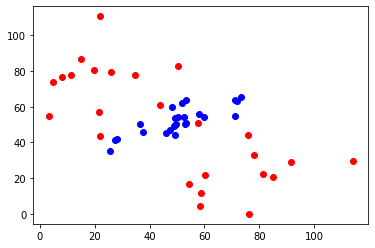

In [6]:
var = 200
mixture = np.concatenate((
                            multivariate_normal.rvs([75, 25], [[var, 0], [0, var]], size=25),
                            multivariate_normal.rvs([25, 75], [[var, 0], [0, var]], size=25),
                        ))

indices = np.random.choice(mixture.shape[0], 25, replace=False)
mixture_sample = mixture[indices]

plot_distributions(multivariate_normal.rvs([50, 50], [[var, 120], [120, var/2]], size=25),
                    mixture_sample)

# (5)

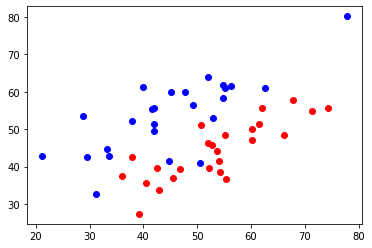

In [7]:
var = 200
plot_distributions(multivariate_normal.rvs([45, 55], [[var, 120], [120, var/2]], size=25),
                    multivariate_normal.rvs([55, 45], [[var, 120], [120, var/2]], size=25))

# (6)

actually will go for just (1), they're equivalent...

# (7)

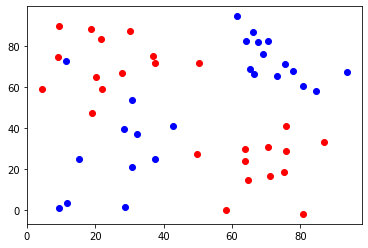

In [8]:
var = 200
mixture1 = np.concatenate((
                            multivariate_normal.rvs([25, 25], [[var, 0], [0, var]], size=25),
                            multivariate_normal.rvs([75, 75], [[var, 0], [0, var]], size=25),
                        ))

indices = np.random.choice(mixture1.shape[0], 25, replace=False)
mixture_sample1 = mixture1[indices]

mixture2 = np.concatenate((
                            multivariate_normal.rvs([75, 25], [[var, 0], [0, var]], size=25),
                            multivariate_normal.rvs([25, 75], [[var, 0], [0, var]], size=25),
                        ))

indices = np.random.choice(mixture2.shape[0], 25, replace=False)
mixture_sample2 = mixture2[indices]

plot_distributions(mixture_sample1,
                    mixture_sample2)

# (8)

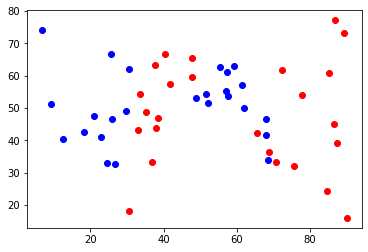

In [157]:
var = 200
mixture1 = np.concatenate((
                            multivariate_normal.rvs([20, 50], [[var/4, 0], [0, var]], size=25),
                            multivariate_normal.rvs([60, 50], [[var/4, 0], [0, var]], size=25),
                        ))

indices = np.random.choice(mixture1.shape[0], 25, replace=False)
mixture_sample1 = mixture1[indices]

mixture2 = np.concatenate((
                            multivariate_normal.rvs([40, 50], [[var/4, 0], [0, var]], size=25),
                            multivariate_normal.rvs([80, 50], [[var/4, 0], [0, var]], size=25),
                        ))

indices = np.random.choice(mixture2.shape[0], 25, replace=False)
mixture_sample2 = mixture2[indices]

plot_distributions(mixture_sample1,
                    mixture_sample2)

In [10]:
aaa = multivariate_normal(mean=[20, 50], cov=[[50, 0], [0, 50]])

In [11]:
aaa.rvs(size=50)

array([[14.86237818, 56.25779907],
       [10.98754083, 45.39667511],
       [ 7.40137497, 52.63124516],
       [12.48833478, 60.66177605],
       [12.90088016, 54.00859479],
       [28.47084673, 41.53390808],
       [29.28041779, 58.80221122],
       [15.31518706, 61.97427764],
       [19.80346775, 61.19233369],
       [14.28241751, 61.83638043],
       [25.2623207 , 49.95303624],
       [22.86378866, 51.5718907 ],
       [26.30366613, 47.00526667],
       [18.39840957, 53.58451026],
       [ 9.76610142, 53.20172275],
       [28.80337681, 44.42525747],
       [16.01036601, 50.07848728],
       [21.38293215, 41.59191088],
       [28.82002713, 53.14823374],
       [28.70635751, 42.6453608 ],
       [10.58774953, 31.29544764],
       [23.402414  , 37.13374218],
       [23.75067519, 41.18996783],
       [ 7.91840972, 52.04320938],
       [31.94842068, 59.97267997],
       [16.68800558, 53.30412318],
       [26.04149698, 38.63318389],
       [26.22007764, 47.48810534],
       [22.67358595,